In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv('/home/nakul76/python_code/ml/datasets/Credit-card-dataset/creditcard.csv')

In [16]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking if there are any null values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
#dropping time since it has no significance
data.drop(['Time'],axis=1,inplace=True)

In [19]:
#creating a copy of the original data 
orgdata =data.copy()

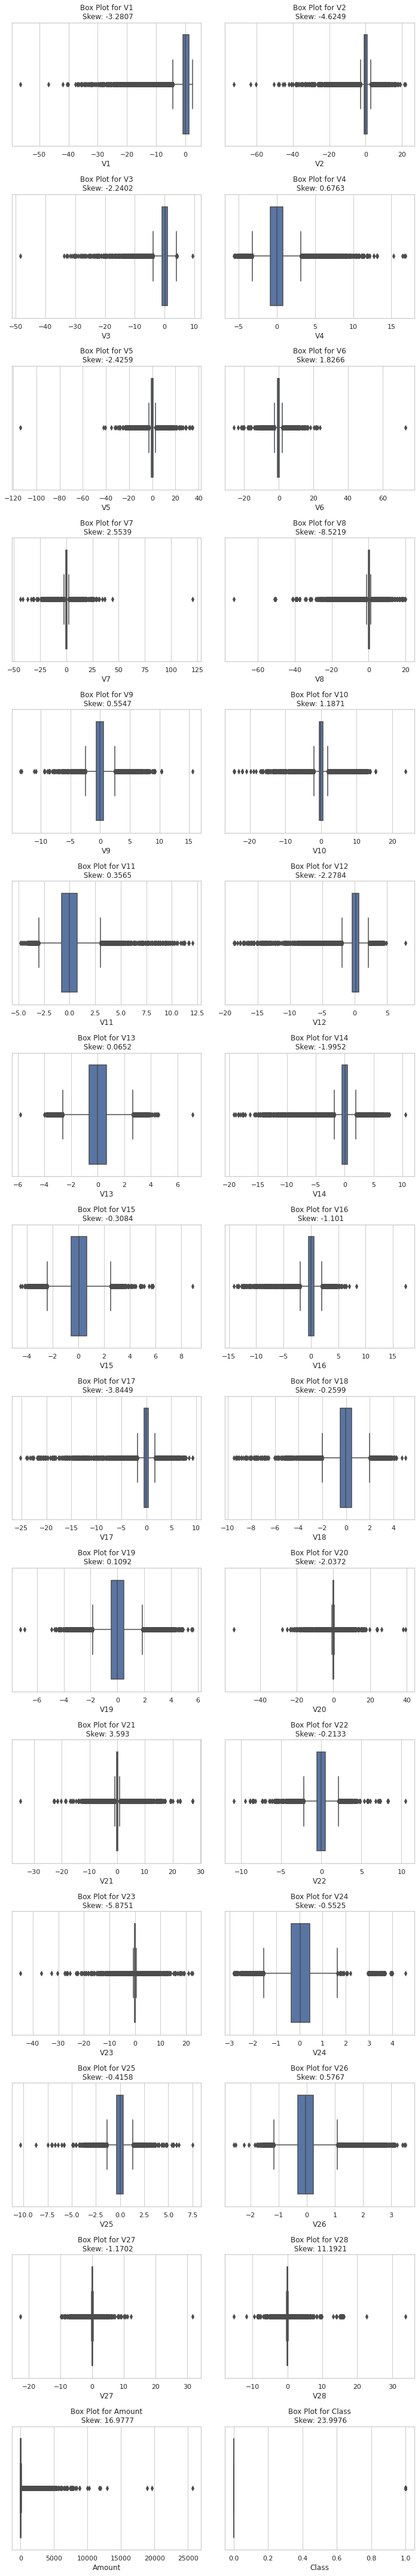

In [20]:
#box plot for all the  features

plt.figure(figsize = (10,60))
index=1
for col in data.columns:
    sns.set_theme(style="whitegrid")
    plt.subplot(15,2,index)
    plt.tight_layout()
    sns.boxplot(x= data[col],hue=data['Class'],orient='v')
    plt.title(f"Box Plot for {col}\n Skew: {round(data[col].skew(),4)}")
    index+=1

    
    

In [21]:
#from the box pplot above we see that there arer many outliers in the dataset

In [29]:
#counting the number of  outliers in a column and then removing those outliers

total=0
for col in data.columns:
    if(col != "Class"):
        print(col)
        q1= np.quantile(data[col],.25)
        q3 =np.quantile(data[col],.75)
        iqr = q3-q1
        thres = 1.5
        buffer = iqr*thres
        lower_cut = q1-buffer
        upper_cut = q3+buffer
        print(f"lower buffer: {lower_cut}\t Upper Buffer: {upper_cut}")
        outs = [x for x in data[col].values if x>upper_cut or x<lower_cut]
        data.drop(data[(data[col]>upper_cut) | (data[col]<lower_cut)].index,inplace=True)
        print(len(outs))


V1
lower buffer: -4.274396001792603	 Upper Buffer: 4.669664311280146
7062
V2
lower buffer: -2.6255847410984194	 Upper Buffer: 2.8290538927250966
8438
V3
lower buffer: -3.5180879152827487	 Upper Buffer: 3.7981285464149614
1109
V4
lower buffer: -3.180354465462066	 Upper Buffer: 3.061459832143366
10146
V5
lower buffer: -2.5172127998962646	 Upper Buffer: 2.4422811776972386
8061
V6
lower buffer: -2.3229695484269586	 Upper Buffer: 1.8128512014423872
13618
V7
lower buffer: -2.0712441888088082	 Upper Buffer: 2.175136412811712
2571
V8
lower buffer: -0.8639477365143191	 Upper Buffer: 0.8819412179693511
15113
V9
lower buffer: -2.351277555802399	 Upper Buffer: 2.3653896409509607
5681
V10
lower buffer: -1.7069000888920656	 Upper Buffer: 1.550990933977138
8034
V11
lower buffer: -3.132401412630001	 Upper Buffer: 3.1409315796524933
92
V12
lower buffer: -1.7940501297460638	 Upper Buffer: 2.0998636659125403
10192
V13
lower buffer: -2.7550643168888675	 Upper Buffer: 2.619392251615441
1244
V14
lower buffe

In [30]:
print(data.shape)
print(orgdata.shape)

(110122, 30)
(284807, 30)


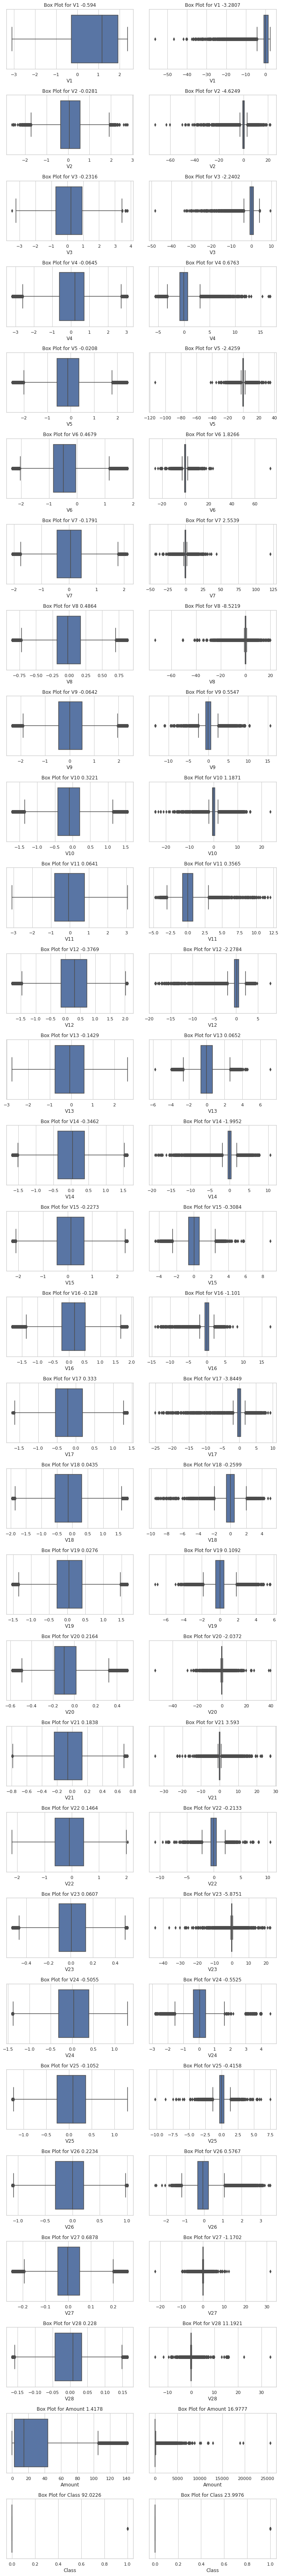

In [31]:
#box plot for all features with and without outliers removed

plt.figure(figsize = (10,90))
index=1
for col in data.columns:
    sns.set_theme(style="whitegrid")
    plt.subplot(30,2,index)
    plt.tight_layout()
    sns.boxplot(x= data[col],hue=data['Class'],orient='v')
    plt.title(f"Box Plot for {col} {round(data[col].skew(),4)}")
    index+=1
    
    sns.set_theme(style="whitegrid")
    plt.subplot(30,2,index)
    plt.tight_layout()
    sns.boxplot(x= orgdata[col],orient='v')
    plt.title(f"Box Plot for {col} {round(orgdata[col].skew(),4)}")
    index+=1



In [39]:
#judging by the box plot we can see that we have efficiently removed all the outliers

In [40]:
print(data['Class'].value_counts())
print()
print(orgdata['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    284315
1       492
Name: Class, dtype: int64


In [41]:
# after removing the outliers the number of fraud transcation went from 492 to 13
#this goes on to prove that in this case the outliers in certain features reflected fraud transcation  
#thereby were important

#also we cant just remove outliers only from non fraud transcation since that would lead to imbalance


#thereby we wont be removing the outliers in this case


#replacing the original data
data = orgdata.copy()
print(data.shape)

print(data['Class'].value_counts())

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64


In [42]:
#as we can see the dataset is highly imbalanced 

data['Class'].value_counts()
  
#using imbalanced dataset will lead to imbalanced result since its imbalanced towards negative(0) results therefore
#it will classify most of the cases as 0 

#to solve this problem we will resample the dataset ,
#create a balanced dataset with equal no of values of both classes

0    284315
1       492
Name: Class, dtype: int64

In [43]:
#creating a balanced dataset

pve = data[data['Class']==1] # positive  samples
nve = data[data['Class']==0] # negative samples

#checking the shapes of both 
print(pve.shape)
print(nve.shape)

nve = nve.sample(n=492,random_state=42)

newdata = pd.concat([nve,pve])
newdata = newdata.sample(frac=1,random_state=42)

print(newdata.shape)
print(newdata.head(5))
print(newdata['Class'].value_counts())

(492, 30)
(284315, 30)
(984, 30)
               V1        V2         V3        V4        V5        V6  \
42756  -10.645800  5.918307 -11.671043  8.807369 -7.975501 -3.586806   
1686    -1.379848  0.536720   2.647870  1.408111  0.126442  0.986525   
111690  -4.198735  0.194121  -3.917586  3.920748 -1.875486 -2.118933   
128360  -0.671155  1.183971   0.793623 -0.218410  0.357282 -0.023707   
20746    1.087002  0.065459   0.485043  1.343874 -0.283361  0.002520   

               V7        V8        V9        V10  ...       V21       V22  \
42756  -13.616797  6.428169 -7.368451 -12.888158  ...  2.571970  0.206809   
1686     0.960251 -0.629717  1.729173   1.346832  ... -0.666874 -0.343574   
111690  -3.614445  1.687884 -2.189871  -4.684233  ...  0.801312 -0.183001   
128360   0.363563  0.463983 -0.704518  -0.774565  ... -0.083474 -0.352537   
20746   -0.076665  0.165384  0.151865   0.065573  ... -0.040723  0.016005   

             V23       V24       V25       V26       V27       V28  Amo

In [44]:
#rescaing the data to values between 0,1

mm = MinMaxScaler()

newdata.iloc[:,:-1] = mm.fit_transform(newdata.iloc[:,:-1])
newdata.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42756,0.604985,0.470142,0.567425,0.801174,0.425595,0.218896,0.606576,0.777580,0.324949,0.344372,...,0.507387,0.527209,0.696136,0.839899,0.680091,0.390677,0.730606,0.470415,0.000000,1
1686,0.886588,0.293464,0.985531,0.356352,0.669625,0.573958,0.901898,0.661975,0.812329,0.763354,...,0.442611,0.495301,0.763030,0.724891,0.685697,0.172114,0.661632,0.417293,0.020603,0
111690,0.800919,0.282216,0.793823,0.507404,0.609327,0.332858,0.809217,0.699936,0.602377,0.585840,...,0.471974,0.504610,0.744722,0.774123,0.663342,0.236245,0.825226,0.476276,0.112378,1
128360,0.908126,0.314713,0.931388,0.258570,0.676578,0.495526,0.889810,0.679889,0.681950,0.700914,...,0.454279,0.494781,0.758504,0.512547,0.642205,0.347637,0.701371,0.527659,0.000612,0
20746,0.961559,0.277992,0.922377,0.352490,0.657282,0.497562,0.880891,0.674998,0.727829,0.725642,...,0.455134,0.516147,0.760252,0.753261,0.765841,0.213658,0.706886,0.514420,0.008731,0
27627,0.938659,0.331650,0.832396,0.490764,0.648195,0.446540,0.836338,0.683349,0.610276,0.640273,...,0.465332,0.506850,0.749567,0.511350,0.799658,0.358544,0.757523,0.596045,0.008919,1
93788,0.961359,0.307453,0.900095,0.436621,0.678237,0.472462,0.883281,0.675175,0.667891,0.717998,...,0.455768,0.511913,0.760028,0.695227,0.741351,0.318959,0.706731,0.529655,0.000000,1
193189,0.912553,0.273452,0.862556,0.300541,0.660069,0.543855,0.921170,0.676935,0.699898,0.703877,...,0.465249,0.560103,0.803036,0.431357,0.480805,0.063150,0.717338,0.596958,0.184245,0
102442,0.527582,0.695608,0.618944,0.471309,0.521206,0.944563,0.502562,0.060454,0.698717,0.575000,...,1.000000,0.000000,0.972089,0.543562,0.721737,0.272653,0.827179,0.769790,0.000470,1
4920,0.858522,0.333599,0.897710,0.411788,0.641069,0.491482,0.893836,0.665752,0.706929,0.678814,...,0.450065,0.461164,0.768991,0.680147,0.661747,0.162116,0.707945,0.470382,0.112862,1


In [45]:
print(newdata.shape)
newdata.head(10)

(984, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42756,0.604985,0.470142,0.567425,0.801174,0.425595,0.218896,0.606576,0.777580,0.324949,0.344372,...,0.507387,0.527209,0.696136,0.839899,0.680091,0.390677,0.730606,0.470415,0.000000,1
1686,0.886588,0.293464,0.985531,0.356352,0.669625,0.573958,0.901898,0.661975,0.812329,0.763354,...,0.442611,0.495301,0.763030,0.724891,0.685697,0.172114,0.661632,0.417293,0.020603,0
111690,0.800919,0.282216,0.793823,0.507404,0.609327,0.332858,0.809217,0.699936,0.602377,0.585840,...,0.471974,0.504610,0.744722,0.774123,0.663342,0.236245,0.825226,0.476276,0.112378,1
128360,0.908126,0.314713,0.931388,0.258570,0.676578,0.495526,0.889810,0.679889,0.681950,0.700914,...,0.454279,0.494781,0.758504,0.512547,0.642205,0.347637,0.701371,0.527659,0.000612,0
20746,0.961559,0.277992,0.922377,0.352490,0.657282,0.497562,0.880891,0.674998,0.727829,0.725642,...,0.455134,0.516147,0.760252,0.753261,0.765841,0.213658,0.706886,0.514420,0.008731,0
27627,0.938659,0.331650,0.832396,0.490764,0.648195,0.446540,0.836338,0.683349,0.610276,0.640273,...,0.465332,0.506850,0.749567,0.511350,0.799658,0.358544,0.757523,0.596045,0.008919,1
93788,0.961359,0.307453,0.900095,0.436621,0.678237,0.472462,0.883281,0.675175,0.667891,0.717998,...,0.455768,0.511913,0.760028,0.695227,0.741351,0.318959,0.706731,0.529655,0.000000,1
193189,0.912553,0.273452,0.862556,0.300541,0.660069,0.543855,0.921170,0.676935,0.699898,0.703877,...,0.465249,0.560103,0.803036,0.431357,0.480805,0.063150,0.717338,0.596958,0.184245,0
102442,0.527582,0.695608,0.618944,0.471309,0.521206,0.944563,0.502562,0.060454,0.698717,0.575000,...,1.000000,0.000000,0.972089,0.543562,0.721737,0.272653,0.827179,0.769790,0.000470,1
4920,0.858522,0.333599,0.897710,0.411788,0.641069,0.491482,0.893836,0.665752,0.706929,0.678814,...,0.450065,0.461164,0.768991,0.680147,0.661747,0.162116,0.707945,0.470382,0.112862,1


In [46]:
newdata['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot:>

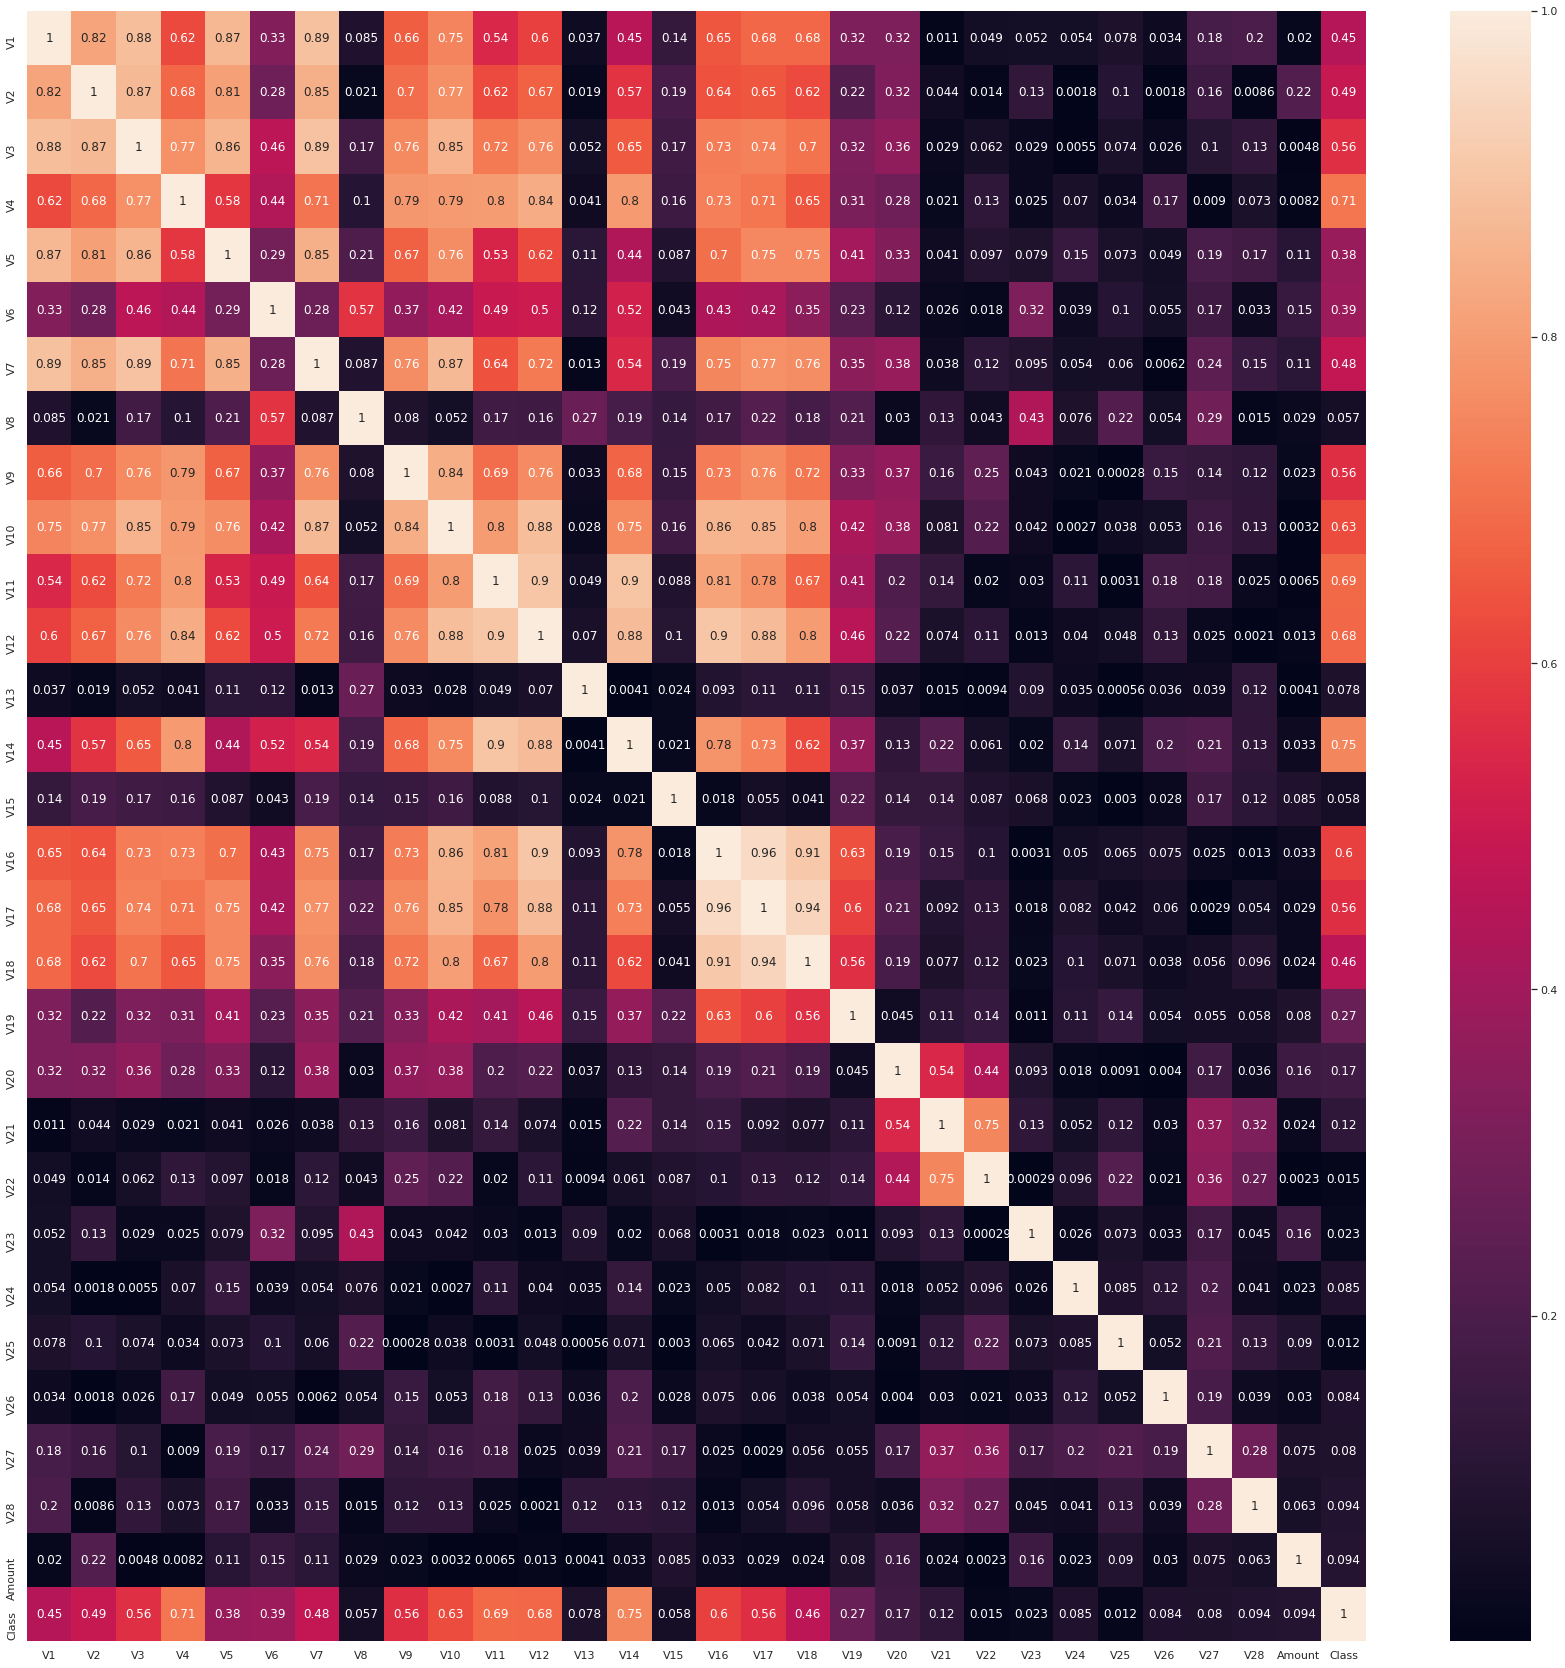

In [47]:
corr =newdata.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr.abs(),annot=True)

In [48]:
# checking the skewness of the data

for col in newdata.columns:
    data  = newdata[col]
    skew = round(data.skew(),4)
    logdata= np.log(data+0.01)
    logskew = round(logdata.skew(),4)
    powerdata = np.power(data,3)
    powerskew = round(powerdata.skew(),4)
    if(data.isna().any() or logdata.isna().any() or powerdata.isna().any()):
        print("sike")
    print(f"{col}:\t{skew}\t{logskew}\t{powerskew}")

print()
print("****************************************************")
    
for col in newdata.columns:
    if(abs(newdata[col].skew())>2.5):
        if(newdata[col].skew()>0):
            print(f"{col}")
            print(f"old skew: {newdata[col].skew()}")
            trans = np.log(newdata[col]+0.1)
            newdata[col] = trans
            print(f"new skew: {newdata[col].skew()}")
        elif(newdata[col].skew()<0):
            print(f"{col}")
            print(f"old skew: {newdata[col].skew()}")
            trans = np.power(newdata[col],2)
            newdata[col] = trans
            print(f"new skew: {newdata[col].skew()}")
print()       

V1:	-2.6285	-5.6255	-1.2035
V2:	1.8461	-2.24	4.9594
V3:	-2.2143	-4.9124	-0.8771
V4:	0.8577	-0.5527	2.6231
V5:	-2.3008	-5.1242	-0.0471
V6:	0.4187	-2.3265	3.6852
V7:	-2.7799	-9.0315	-1.5632
V8:	-3.7213	-10.2982	3.0312
V9:	-1.3343	-6.296	0.14
V10:	-1.7466	-5.3674	-0.4304
V11:	1.0652	-0.3748	3.6137
V12:	-1.3634	-3.3688	-0.4707
V13:	-0.0151	-2.4346	1.6748
V14:	-1.0038	-2.9843	-0.304
V15:	-0.4789	-4.4484	0.783
V16:	-1.4089	-3.0709	-0.4186
V17:	-1.5177	-3.2373	-0.4239
V18:	-1.3828	-3.4349	0.0881
V19:	0.5425	-2.4641	2.5088
V20:	2.516	-6.082	13.4965
V21:	3.9178	-13.4784	11.3473
V22:	-1.5585	-10.957	6.8931
V23:	-6.6053	-23.7797	2.7124
V24:	-0.6549	-4.88	0.4766
V25:	-0.6799	-10.4044	1.092
V26:	0.5983	-1.8244	7.484
V27:	-2.7171	-11.0807	0.5816
V28:	-0.7784	-4.9575	2.9911
Amount:	4.1463	1.066	14.0624
Class:	0.0	0.0	0.0

****************************************************
V1
old skew: -2.6284986830924515
new skew: -1.7162644758857617
V7
old skew: -2.7799433038097576
new skew: -1.953978242139737
V8


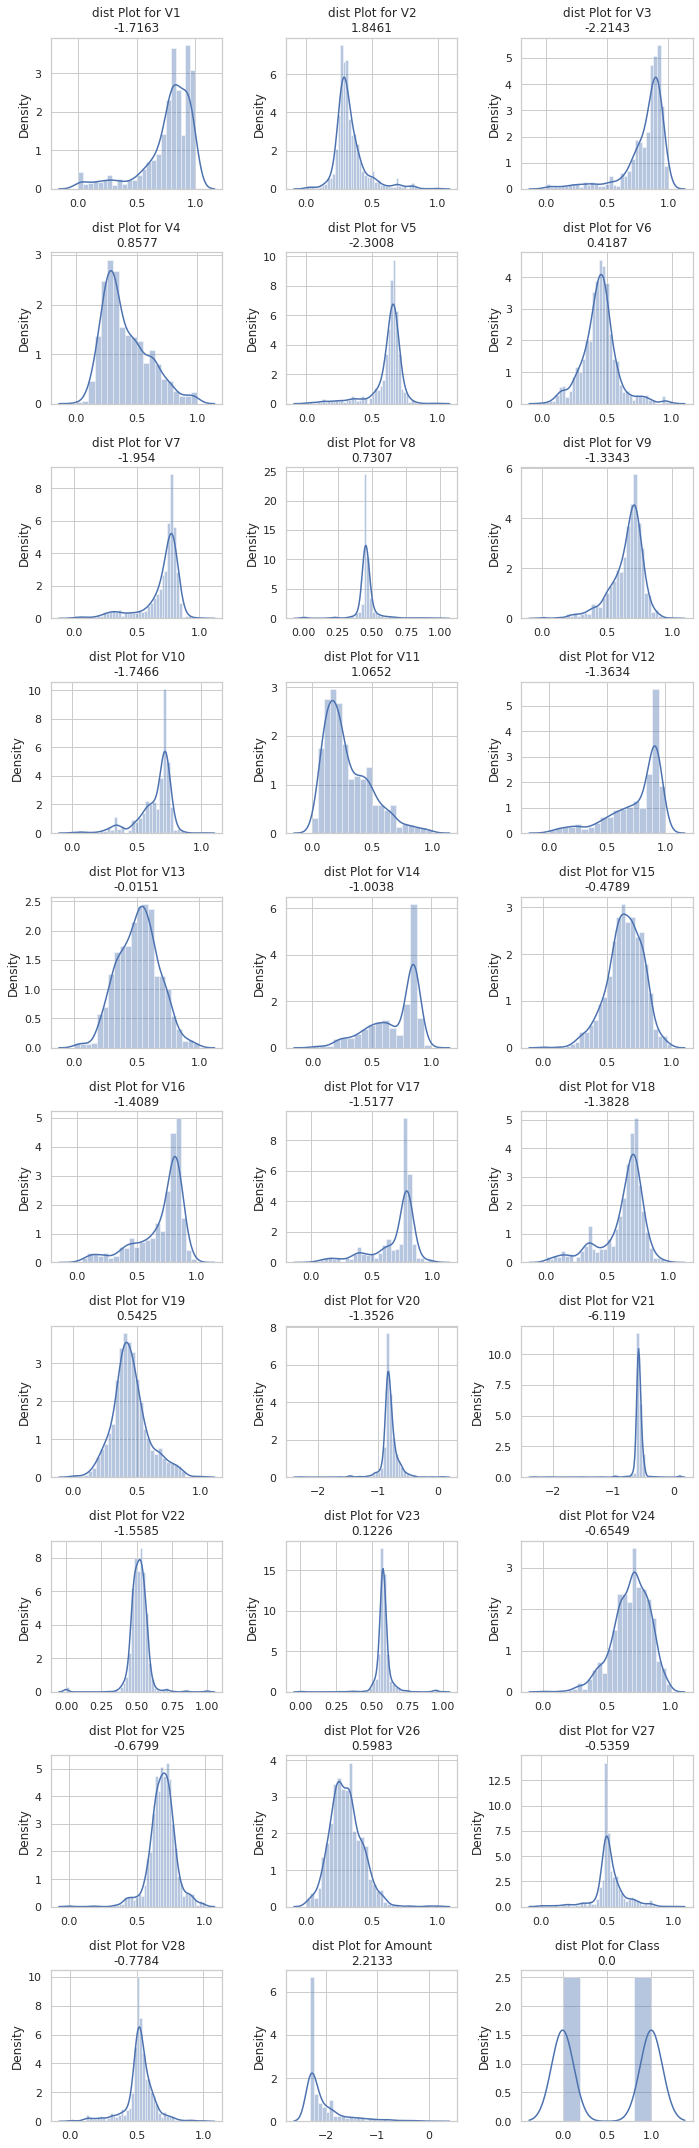

In [49]:
#plotting distribution plot for all the numeric columns

plt.figure(figsize = (10,30))
index=1

for col in newdata.columns:
    plt.subplot(10,3,index)
    plt.tight_layout()
    sns.distplot(x= newdata[col])
    plt.title(f"dist Plot for {col}\n{round(newdata[col].skew(),4)}")
    index+=1

In [50]:
def split_data(newdata):

    #dividing data into x and y variables
    x = newdata.iloc[:,:-1]
    y = newdata.iloc[:,-1]

    print(x.shape)
    print(y.shape)


    #splitting the dataset in train and test and using Y as stratify 

    xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2,shuffle=True,stratify=y)

    print(f"{xtr.shape}\n{xte.shape}")
    print(f"{ytr.shape}\n{yte.shape}")
    
    return xtr,xte,ytr,yte

xtr,xte,ytr,yte = split_data(newdata)

(984, 29)
(984,)
(787, 29)
(197, 29)
(787,)
(197,)


In [51]:
#scoring metric used in gridSearch as well as cross val score

from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [52]:
#performing 5 split k fold stratified cross val and evaluating our model on basis of recall
cv = StratifiedKFold(5,shuffle=True,)
scoring = 'recall'

#using gridSearch for getting the best hyperparameter values

#gridSearchCV for Logistic Regression 
print("Linear Regression")
lr = LogisticRegression()
param= {'C':[0.1,1,2,3,10,100,1000,10000],'penalty':["l1","l2"]}
lrg = GridSearchCV(lr,cv=cv,param_grid = param,verbose=1,scoring=scoring)
lrg.fit(xtr,ytr)
print(f"{lrg.best_score_}")
print(lrg.best_params_)
print()
# lr = lrg.best_estimator_


#gridSearchCV for Decision Tree   
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier()
param= {'criterion':["gini", 'entropy'],'max_features':["auto", 'sqrt', 'log2','None']}
dtg = GridSearchCV(dtc,cv=cv,param_grid = param,verbose=1,scoring=scoring)
dtg.fit(xtr,ytr)
print(dtg.best_score_)
print(dtg.best_params_)
print()


#gridSearchCV for SVM
print("Support Vector")
svc = SVC()
# svc.get_params()
param= {'C':[0.1,1,10,100,1000,10000,20000],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svg = GridSearchCV(svc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs=-1)
svg.fit(xtr,ytr)
print(svg.best_score_)
print(svg.best_params_)
print()

#gridSearchCV for RF
print("Random Forest Classifier")
rfc  = RandomForestClassifier()
# rfc.get_params()
param= {'n_estimators':[50,100,200],'criterion':['entropy', 'gini'],'max_features':["auto",'sqrt', 'log2','None']}
rfg = GridSearchCV(rfc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs =-1)
rfg.fit(xtr,ytr)
print(rfg.best_score_)
print(rfg.best_params_)
print()

#gridSearchCV for GB
print("Gradient Boost")
gbc  = GradientBoostingClassifier()
# gbc.get_params()
param= {'learning_rate':[0.01,0.1,0.5],'criterion':['friedman_mse', 'mse', 'mae'],'max_features':["auto",'sqrt', 'log2','None']}
gbg = GridSearchCV(gbc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs=-1)
gbg.fit(xtr,ytr)
print("Gradient Boost")
print(gbg.best_score_)
print(gbg.best_params_)
print()


Linear Regression
Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.9236936059720872
{'C': 10000, 'penalty': 'l2'}

Decision Tree Classifier
Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.9186303148328466
{'criterion': 'entropy', 'max_features': 'sqrt'}

Support Vector
Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.9288542680947744
{'C': 10000, 'kernel': 'rbf'}

Random Forest Classifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.9057773450178515
{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}

Gradient Boost
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Gradient Boost
0.9262577085361896
{'criterion': 'mse', 'learning_rate': 0.1, 'max_features': 'sqrt'}



In [55]:
#print the performance of all the models with different metrics 

models={
'lr':lrg.best_estimator_,
'dtc' :dtg.best_estimator_,
'svc' :svg.best_estimator_,
'rfc' :rfg.best_estimator_,
'gbc' :gbg.best_estimator_
}

models_performance={}
metrics = ['recall','roc_auc','f1','precision','accuracy']

for metric in metrics:
    for key in models.keys():
        if(key not in models_performance.keys()):
            models_performance[key] ={}
        score = cross_val_score(models[key],xtr,ytr,cv=cv,scoring=metric)
        models_performance[key][metric]= score
        print(f"{key}:{metric}:{score.mean()} +/- {score.std()}")
    print()

lr:recall:0.9210645894190199 +/- 0.024871589658709906
dtc:recall:0.9057773450178515 +/- 0.03316647484875736
svc:recall:0.9185978578383642 +/- 0.024863328902619265
rfc:recall:0.8956832197338527 +/- 0.023297340342380256
gbc:recall:0.9058747160012981 +/- 0.03255211637399178

lr:roc_auc:0.977210670545072 +/- 0.006219978733242509
dtc:roc_auc:0.8958455047062641 +/- 0.011199967776224515
svc:roc_auc:0.9702394011479093 +/- 0.014192383398441972
rfc:roc_auc:0.9814684941187105 +/- 0.011016279771613083
gbc:roc_auc:0.9788433806219418 +/- 0.004953642266951434

lr:f1:0.9305501879562497 +/- 0.007588382594030676
dtc:f1:0.9004979308407854 +/- 0.022069553984564234
svc:f1:0.9183905135852655 +/- 0.007689588944588512
rfc:f1:0.9307475940278334 +/- 0.02192619217941707
gbc:f1:0.9334361503524196 +/- 0.016064802217152355

lr:precision:0.9581125043816583 +/- 0.014819028676647368
dtc:precision:0.8873775935231416 +/- 0.032743239513527395
svc:precision:0.9209316567314503 +/- 0.037650407553082035
rfc:precision:0.98333

SVC precision Score: 0.9381443298969072
LR precision Score: 0.9108910891089109


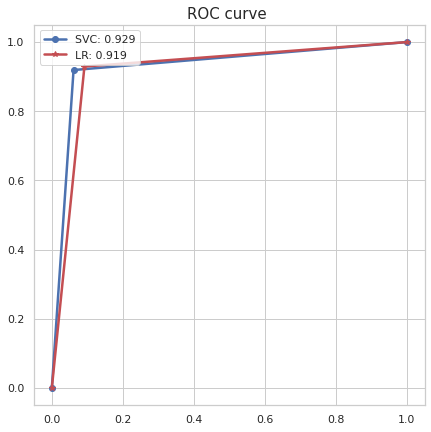

SVC Recall: 0.9191919191919192
LR Recall: 0.9292929292929293


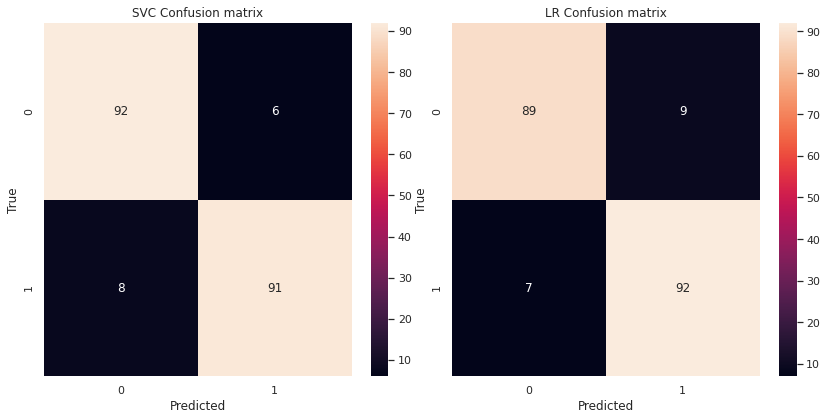

In [61]:

#from the above evalualtion we see that Logistic Regression and SVC perform very well.
#therefore we will use them for our further evaluation 

#selecting the best models
lr= lrg.best_estimator_
svc = svg.best_estimator_

#taking their predictions
ypred_sv = svc.predict(xte)
ypred_gb= lr.predict(xte)



print(f"SVC precision Score: {precision_score(yte,ypred_sv)}")
print(f"LR precision Score: {precision_score(yte,ypred_gb)}")

fpr_sv,tpr_sv,thres_sv = roc_curve(yte,ypred_sv)
fpr_gb,tpr_gb,thres_gb = roc_curve(yte,ypred_gb)

auc_gb= round(roc_auc_score(yte,ypred_gb),3)
auc_sv= round(roc_auc_score(yte,ypred_sv),3)


plt.figure(figsize=(7,7))

plt.grid(True)
plt.plot(fpr_sv,tpr_sv,'-bo',label=f"SVC: {auc_sv}",linewidth =2.5)
plt.plot(fpr_gb,tpr_gb,'-r*',label=f"LR: {auc_gb}",linewidth =2.5)
plt.legend(loc="upper left")
plt.title("ROC curve ",fontdict={'fontsize':15})
plt.show()


print(f"SVC Recall: {recall_score(yte,ypred_sv)}")
print(f"LR Recall: {recall_score(yte,ypred_gb)}")


plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_sv,labels=lr.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("SVC Confusion matrix")

plt.subplot(1,2,2)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_gb,labels=lr.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("LR Confusion matrix")

plt.show()

In [63]:
#we achieved a peak recall score of 92% 

#performing further feature selection to see if it impacts our model performance

In [64]:


corr = newdata.corr()
corr['Class'].abs().mean()

0.35926364307237846

In [65]:
#segregating our features on the basis of correlation score threshold

threshold = 0.35
features =[]
not_features=[]
corr = newdata.corr()
for col in newdata.columns:
    if(corr.abs()['Class'][col]>threshold):
        print(f"{col}: {corr['Class'][col]}")
        features.append(col)
    else:
        print(f"{col}: {corr['Class'][col]}")
        not_features.append(col)
    
print(features)   
print(not_features)


V1: -0.4957835406317798
V2: 0.49190373519689345
V3: -0.5643709529396339
V4: 0.712609832951822
V5: -0.3822335222294695
V6: -0.3892572578562518
V7: -0.5213818131327943
V8: 0.13699036370942108
V9: -0.5595885019263181
V10: -0.6283272470852653
V11: 0.6850561183340911
V12: -0.6820388725234747
V13: -0.07816476983694798
V14: -0.7492282142922371
V15: -0.05763560764278059
V16: -0.5977897679727968
V17: -0.5591694223508997
V18: -0.4648567508177909
V19: 0.26780887103190404
V20: 0.13421672356780565
V21: 0.06957186675645848
V22: 0.014889061493508732
V23: 0.0028274083809461314
V24: -0.08456569459297665
V25: 0.012414589189667336
V26: 0.08447112455390651
V27: 0.16693918336416724
V28: 0.09397014952157282
Amount: 0.08984832828776965
Class: 1.0
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Class']
['V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [66]:
#keeping only the relevant features

newdata = newdata.loc[:,features]
newdata.head(10)

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
42756,0.366006,0.470142,0.567425,0.801174,0.425595,0.218896,0.367934,0.324949,0.344372,0.641427,0.265480,0.239901,0.164424,0.143714,0.146807,1
1686,0.786038,0.293464,0.985531,0.356352,0.669625,0.573958,0.813420,0.812329,0.763354,0.122213,0.931500,0.758761,0.700255,0.809229,0.617380,0
111690,0.641471,0.282216,0.793823,0.507404,0.609327,0.332858,0.654833,0.602377,0.585840,0.469357,0.663516,0.574745,0.626128,0.594754,0.636488,1
128360,0.824693,0.314713,0.931388,0.258570,0.676578,0.495526,0.791761,0.681950,0.700914,0.086739,0.903221,0.870168,0.826880,0.782150,0.679040,0
20746,0.924595,0.277992,0.922377,0.352490,0.657282,0.497562,0.775969,0.727829,0.725642,0.248240,0.945777,0.868163,0.786730,0.793105,0.681810,0
27627,0.881080,0.331650,0.832396,0.490764,0.648195,0.446540,0.699461,0.610276,0.640273,0.359999,0.693339,0.612932,0.739480,0.629036,0.689344,1
93788,0.924211,0.307453,0.900095,0.436621,0.678237,0.472462,0.780184,0.667891,0.717998,0.314035,0.893050,0.765072,0.897379,0.836478,0.792009,1
193189,0.832753,0.273452,0.862556,0.300541,0.660069,0.543855,0.848554,0.699898,0.703877,0.111458,0.931606,0.879083,0.823537,0.763403,0.761295,0
102442,0.278343,0.695608,0.618944,0.471309,0.521206,0.944563,0.252569,0.698717,0.575000,0.471433,0.682761,0.447620,0.458513,0.592895,0.477799,1
4920,0.737060,0.333599,0.897710,0.411788,0.641069,0.491482,0.798943,0.706929,0.678814,0.306595,0.588186,0.783176,0.686045,0.638858,0.517951,1


<AxesSubplot:>

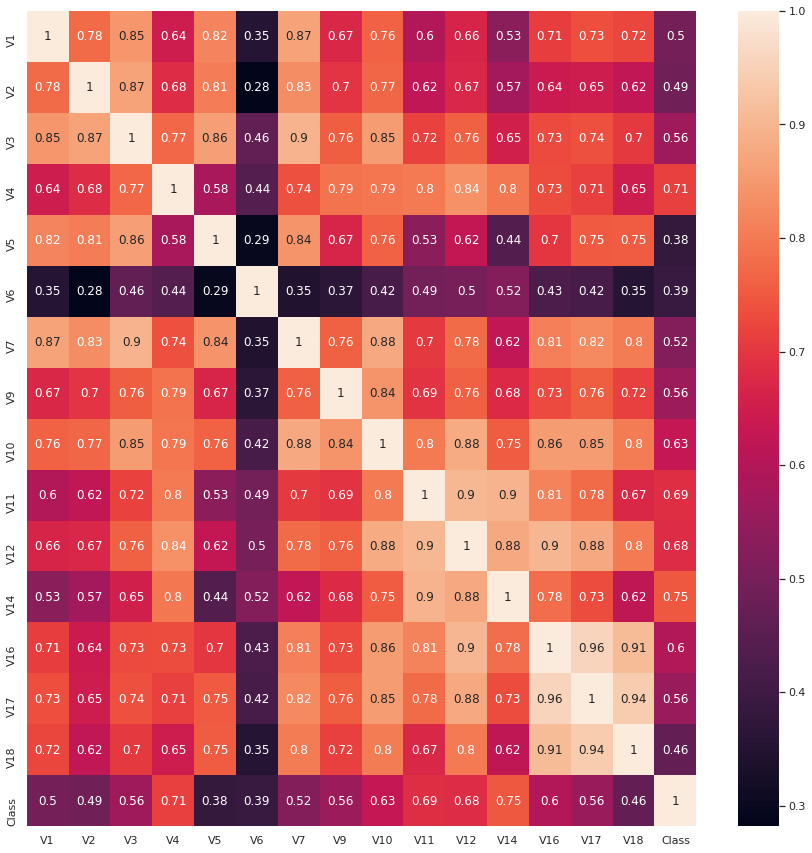

In [67]:
plt.figure(figsize = (15,15))

corr = newdata.corr()
sns.heatmap(corr.abs(),annot =True)

In [68]:
xtr,xte,ytr,yte = split_data(newdata)

(984, 15)
(984,)
(787, 15)
(197, 15)
(787,)
(197,)


In [69]:
#performing 5 split k fold stratified cross val and evaluating our model on basis of recall
cv = StratifiedKFold(5,shuffle=True,)
scoring = 'recall'

#using gridSearch for getting the best hyperparameter values

#gridSearchCV for Logistic Regression 
print("Linear Regression")
lr = LogisticRegression()
param= {'C':[0.1,1,2,3,10,100,1000,10000],'penalty':["l1","l2"]}
lrg = GridSearchCV(lr,cv=cv,param_grid = param,verbose=1,scoring=scoring)
lrg.fit(xtr,ytr)
print(f"{lrg.best_score_}")
print(lrg.best_params_)
print()
# lr = lrg.best_estimator_


#gridSearchCV for Decision Tree   
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier()
param= {'criterion':["gini", 'entropy'],'max_features':["auto", 'sqrt', 'log2','None']}
dtg = GridSearchCV(dtc,cv=cv,param_grid = param,verbose=1,scoring=scoring)
dtg.fit(xtr,ytr)
print(dtg.best_score_)
print(dtg.best_params_)
print()


#gridSearchCV for SVM
print("Support Vector")
svc = SVC()
# svc.get_params()
param= {'C':[0.1,1,10,100,1000,10000,20000],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
svg = GridSearchCV(svc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs=-1)
svg.fit(xtr,ytr)
print(svg.best_score_)
print(svg.best_params_)
print()

#gridSearchCV for RF
print("Random Forest Classifier")
rfc  = RandomForestClassifier()
# rfc.get_params()
param= {'n_estimators':[50,100,200],'criterion':['entropy', 'gini'],'max_features':["auto",'sqrt', 'log2','None']}
rfg = GridSearchCV(rfc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs =-1)
rfg.fit(xtr,ytr)
print(rfg.best_score_)
print(rfg.best_params_)
print()

#gridSearchCV for GB
print("Gradient Boost")
gbc  = GradientBoostingClassifier()
# gbc.get_params()
param= {'learning_rate':[0.01,0.1,0.5],'criterion':['friedman_mse', 'mse', 'mae'],'max_features':["auto",'sqrt', 'log2','None']}
gbg = GridSearchCV(gbc,cv=cv,param_grid = param,verbose=1,scoring=scoring,n_jobs=-1)
gbg.fit(xtr,ytr)
print("Gradient Boost")
print(gbg.best_score_)
print(gbg.best_params_)
print()


Linear Regression
Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.8959428756897111
{'C': 10000, 'penalty': 'l2'}

Decision Tree Classifier
Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.9087309315157416
{'criterion': 'entropy', 'max_features': 'sqrt'}

Support Vector
Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.9289516390782214
{'C': 1000, 'kernel': 'rbf'}

Random Forest Classifier
Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.9060370009737099
{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

Gradient Boost
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Gradient Boost
0.9162609542356378
{'criterion': 'mae', 'learning_rate': 0.5, 'max_features': 'sqrt'}



In [71]:
#print the performance of all the models with different metrics 

models={
'lr':lrg.best_estimator_,
'dtc' :dtg.best_estimator_,
'svc' :svg.best_estimator_,
'rfc' :rfg.best_estimator_,
'gbc' :gbg.best_estimator_
}

models_performance={}
metrics = ['recall','roc_auc','f1','precision','accuracy']

for metric in metrics:
    for key in models.keys():
        if(key not in models_performance.keys()):
            models_performance[key] ={}
        score = cross_val_score(models[key],xtr,ytr,cv=cv,scoring=metric)
        models_performance[key][metric]= score
        print(f"{key}:{metric}:{score.mean()} +/- {score.std()}")
    print()

lr:recall:0.9009737098344693 +/- 0.012768599780163984
dtc:recall:0.9135994806880883 +/- 0.02752031605355561
svc:recall:0.9214216163583252 +/- 0.024384773845723764
rfc:recall:0.893216488153197 +/- 0.04429874435137375
gbc:recall:0.9163258682246024 +/- 0.024633468980614897

lr:roc_auc:0.976717652907366 +/- 0.01427756072445527
dtc:roc_auc:0.9034404414151249 +/- 0.022038096097579937
svc:roc_auc:0.9749904477832695 +/- 0.009210439660739606
rfc:roc_auc:0.9789551312864886 +/- 0.008671206496564854
gbc:roc_auc:0.9629470540141908 +/- 0.0168134378588521

lr:f1:0.9319192345231343 +/- 0.01685700776982025
dtc:f1:0.8885675956225588 +/- 0.028541012967749066
svc:f1:0.934603327800551 +/- 0.02068878479793181
rfc:f1:0.9378268337102671 +/- 0.01461170365861427
gbc:f1:0.9195288706650769 +/- 0.013311505113759375

lr:precision:0.9600186423647739 +/- 0.02428699813058619
dtc:precision:0.8961811652574705 +/- 0.02374260860154053
svc:precision:0.9459581968363088 +/- 0.034044371586564585
rfc:precision:0.96720966167405

SVC precision Score: 0.9666666666666667
LR precision Score: 0.978021978021978


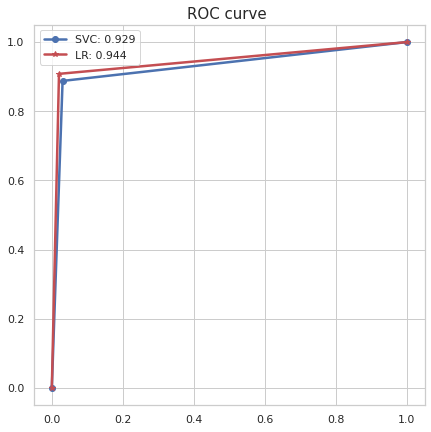

SVC Recall: 0.8877551020408163
LR Recall: 0.9081632653061225


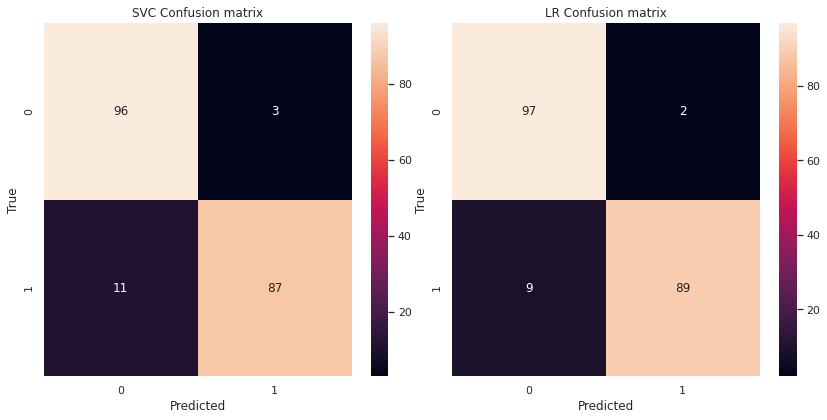

In [73]:

#from the above evalualtion we see that Logistic Regression and SVC perform very well.
#therefore we will use them for our further evaluation 

#selecting the best models
lr= lrg.best_estimator_
svc = svg.best_estimator_

#taking their predictions
ypred_sv = svc.predict(xte)
ypred_gb= lr.predict(xte)



print(f"SVC precision Score: {precision_score(yte,ypred_sv)}")
print(f"LR precision Score: {precision_score(yte,ypred_gb)}")

fpr_sv,tpr_sv,thres_sv = roc_curve(yte,ypred_sv)
fpr_gb,tpr_gb,thres_gb = roc_curve(yte,ypred_gb)

auc_gb= round(roc_auc_score(yte,ypred_gb),3)
auc_sv= round(roc_auc_score(yte,ypred_sv),3)


plt.figure(figsize=(7,7))

plt.grid(True)
plt.plot(fpr_sv,tpr_sv,'-bo',label=f"SVC: {auc_sv}",linewidth =2.5)
plt.plot(fpr_gb,tpr_gb,'-r*',label=f"LR: {auc_gb}",linewidth =2.5)
plt.legend(loc="upper left")
plt.title("ROC curve ",fontdict={'fontsize':15})
plt.show()


print(f"SVC Recall: {recall_score(yte,ypred_sv)}")
print(f"LR Recall: {recall_score(yte,ypred_gb)}")


plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_sv,labels=lr.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("SVC Confusion matrix")

plt.subplot(1,2,2)
plt.tight_layout()
sns.heatmap(confusion_matrix(yte,ypred_gb,labels=lr.classes_),annot=True)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("LR Confusion matrix")

plt.show()

In [74]:
#even after removing all the low correlated features performance is still similar as to when the all the features
#were considered in creating model

# the precision of the model does increase a lot but the recall remains the same 

#therefore we achieved a peak recall score of 92% 

